Nearest centroid classifier

In [1]:
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import fetch_openml
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split 
import scipy.io as scip
start = time()
X, y = fetch_openml('mnist_784', version=1 ,return_X_y=True)
t = time()-start

print('Overall # of samples is', y.shape[0])
print('Size of the features is:', X.shape)
 

Overall # of samples is 70000
Size of the features is: (70000, 784)


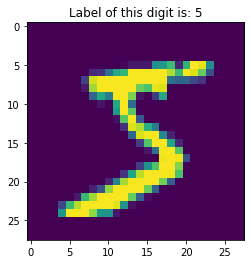

In [2]:
def show_digit(x_vec, label):
    x_mat = x_vec.reshape(28, 28)
    plt.imshow(x_mat)
    plt.title('Label of this digit is: ' + label)
    plt.show()

show_digit(X[0], y[0])

In [3]:
n_train = 60000
n_test = 10000
# split_loc = 60000 # train and test split at location of 60k

# Splitting training and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 0) 

In [4]:
# converting the above numpy arrays to pandas dataframe
df_train = pd.DataFrame(X_train)
df_test = pd.DataFrame(X_test)

In [5]:
y_train_df = pd.DataFrame(data = y_train, columns = ['class'])
y_test_df = pd.DataFrame(data = y_test, columns = ['class'])

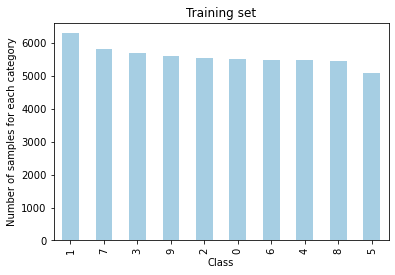

In [6]:
# show distribution of Training set
y_train_df['class'].value_counts().plot(kind = 'bar', colormap = 'Paired')
plt.xlabel('Class')
plt.ylabel('Number of samples for each category')
plt.title('Training set')
plt.show()

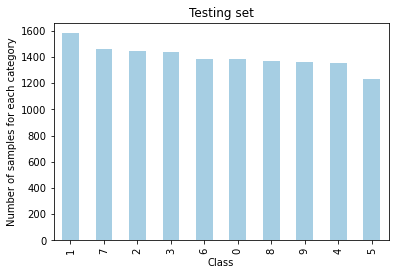

In [7]:
#show distribution of test set
y_test_df['class'].value_counts().plot(kind = 'bar', colormap = 'Paired')
plt.xlabel('Class')
plt.ylabel('Number of samples for each category')
plt.title('Testing set')
plt.show()

In [10]:
# Normalize the data
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [11]:
# Get top 40 PCA components
from sklearn.decomposition import PCA
n_components = 40
pca = PCA(n_components=40).fit(X_std)
pca.explained_variance_ratio_

array([0.05642719, 0.04041226, 0.03738273, 0.02893   , 0.02520752,
       0.02192549, 0.01914282, 0.01740684, 0.01532232, 0.01396087,
       0.01342175, 0.01201421, 0.01113962, 0.01090581, 0.01027985,
       0.00994954, 0.0093125 , 0.00919633, 0.00888595, 0.0086319 ,
       0.00821731, 0.00798409, 0.00762532, 0.00742202, 0.00716532,
       0.0068928 , 0.00681344, 0.0065448 , 0.00626991, 0.00609885,
       0.00596531, 0.00588704, 0.00565936, 0.0055864 , 0.00551134,
       0.00533641, 0.00524479, 0.00514422, 0.00503738, 0.0047302 ])

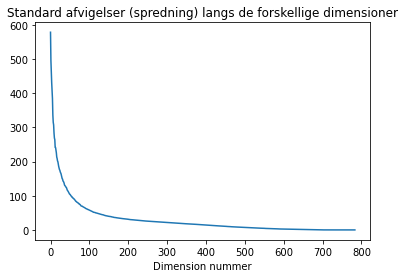

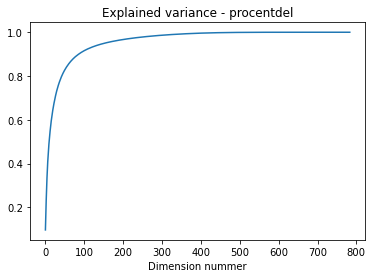

In [13]:
#Fitting PCA
pca = PCA().fit(X_train)

s1 = np.sqrt(pca.explained_variance_) # OBS: Relater til Dmat..
plt.plot(s1)
plt.title('Standard afvigelser (spredning) langs de forskellige dimensioner')
plt.xlabel('Dimension nummer')

#Plotting the explained Varriance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_)/np.sum(pca.explained_variance_))
plt.title('Explained variance - procentdel')
plt.xlabel('Dimension nummer')

functionArray=(np.cumsum(pca.explained_variance_)/np.sum(pca.explained_variance_))

In [14]:
# calculate euclidean distance
def dist(x,y):   
    return np.sqrt(np.sum((x-y)**2))

In [15]:

# Creating the Nearest Centroid Clissifier 
model = NearestCentroid() 
  
# Training the classifier 
model.fit(X_train, y_train.ravel()) 

NearestCentroid()

In [16]:
# Printing Accuracy on Training and Test sets 
print(f"Training Set Score : {model.score(X_train, y_train) * 100} %") 
print(f"Test Set Score : {model.score(X_test, y_test) * 100} %") 
  
# Printing classification report of classifier on the test set set data 
print(f"Model Classification Report : \n{classification_report(y_test, model.predict(X_test))}") 

Training Set Score : 81.07321428571429 %
Test Set Score : 80.28571428571428 %
Model Classification Report : 
              precision    recall  f1-score   support

           0       0.92      0.87      0.89      1387
           1       0.74      0.97      0.84      1580
           2       0.86      0.76      0.81      1443
           3       0.74      0.77      0.76      1435
           4       0.78      0.81      0.79      1350
           5       0.73      0.66      0.69      1231
           6       0.88      0.87      0.87      1387
           7       0.90      0.81      0.85      1458
           8       0.80      0.73      0.76      1368
           9       0.72      0.76      0.74      1361

    accuracy                           0.80     14000
   macro avg       0.81      0.80      0.80     14000
weighted avg       0.81      0.80      0.80     14000

